# Used Car Price Prediction Regression Project

## Problem Definition

There is a huge demand for used cars in the Indian Market today. Cars4U is a budding tech start-up that aims to find footholes in the business trend of selling pre-owned cars in the market.The data is based on the sales of used cars and their various attributes, manufactured in the past 20 years.

## Objective

* In this case, the target variable is the price of the used cars, and the model will analyze the attributes of the cars (such as age, mileage, brand, model, etc.) to make predictions about their prices.
* By leveraging machine learning algorithms and techniques, the project aims to build a regression model that can learn the patterns and relationships between the car attributes and their corresponding prices. This model can then be used to estimate the prices of new, unseen used cars based on their features.
* The objective of this regression project is to provide Cars4U with a reliable and accurate pricing model that can help them determine competitive and fair prices for the pre-owned cars they sell. This information can assist both the company and potential buyers in making informed decisions about pricing and purchasing used cars in the Indian market.
* Key meaningful observations on individual varaibles and the relationship between the variables
* Build a linear regression model to predict the prices of used cars
* Generate a set of insights and recommendations that will help the business

In [155]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
sns.set(color_codes=True)  

import warnings
warnings.filterwarnings("ignore")

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

colors = ["#834F99", "#6E6E6D", "#FABCC9"]
sns.set_palette(sns.color_palette(colors))

# Loading the Dataset

In [156]:
data = pd.read_csv('used_cars_data1.csv', index_col=0)  

In [157]:
df = data.copy()  

# Data Structure Analysis

In [158]:
df.head(10)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
S.No.,,,,,,,,,,,,,
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74
5,Hyundai EON LPG Era Plus Option,Hyderabad,2012,75000,LPG,Manual,First,21.1 km/kg,814 CC,55.2 bhp,5.0,NaN,2.35
6,Nissan Micra Diesel XV,Jaipur,2013,86999,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,NaN,3.50
7,Toyota Innova Crysta 2.8 GX AT 8S,Mumbai,2016,36000,Diesel,Automatic,First,11.36 kmpl,2755 CC,171.5 bhp,8.0,21 Lakh,17.50
8,Volkswagen Vento Diesel Comfortline,Pune,2013,64430,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,NaN,5.20


Observations

Serial Number is set as index
Name is a combination of make of the car and model
Mileage, Engine, Power and New Price values include units in them
NaN values in the New Price column

In [159]:
df.shape

(7253, 13)

In [160]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7253 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7253 non-null   object 
 1   Location           7253 non-null   object 
 2   Year               7253 non-null   int64  
 3   Kilometers_Driven  7253 non-null   int64  
 4   Fuel_Type          7253 non-null   object 
 5   Transmission       7253 non-null   object 
 6   Owner_Type         7253 non-null   object 
 7   Mileage            7251 non-null   object 
 8   Engine             7207 non-null   object 
 9   Power              7207 non-null   object 
 10  Seats              7200 non-null   float64
 11  New_Price          1006 non-null   object 
 12  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 793.3+ KB


In [161]:
df.isnull().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                  46
Seats                  53
New_Price            6247
Price                1234
dtype: int64

In [162]:
df.nunique()

Name                 2041
Location               11
Year                   23
Kilometers_Driven    3660
Fuel_Type               5
Transmission            2
Owner_Type              4
Mileage               450
Engine                150
Power                 386
Seats                   9
New_Price             625
Price                1373
dtype: int64

There are are large number of unique values in the categorical columns

# Initial Data Preprocessing

In [163]:
df.drop("New_Price", axis=1, inplace=True)

In [164]:
df["Name"] = df["Name"].str.strip().str.title()

df["Manufacturer"] = df["Name"].str.split(" ").str[0]

df.drop("Name", axis=1, inplace=True)

df["Mileage"] = df["Mileage"].str.split(" ").str[0].astype("float")

df["Engine"] = df["Engine"].str.split(" ").str[0].astype("float")

In [165]:

def power_num(val):

    """ User defined function to remove the units in Power column """

    if isinstance(val, str):  
        if len(val.strip()) <= 0 or val == "null bhp":
            return np.nan  
        else:
            return val.replace("bhp", "")  
    else:
        return np.nan  


df["Power"] = df["Power"].apply(power_num) 
df["Power"] = df["Power"].astype("float")  

In [166]:
df.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Manufacturer
S.No.,,,,,,,,,,,,
0,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75,Maruti
1,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,Hyundai
2,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50,Honda
3,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00,Maruti
4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74,Audi


Observations

In [167]:
df.shape

(7253, 12)

In [168]:
df.describe(include="all").T  

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Location,7253,11,Mumbai,949,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,7253.0,NaN,NaN,NaN,2013.365366,3.254421,1996.0,2011.0,2014.0,2016.0,2019.0
Kilometers_Driven,7253.0,NaN,NaN,NaN,58699.063146,84427.720583,171.0,34000.0,53416.0,73000.0,6500000.0
Fuel_Type,7253,5,Diesel,3852,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Transmission,7253,2,Manual,5204,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Owner_Type,7253,4,First,5952,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mileage,7251.0,NaN,NaN,NaN,18.14158,4.562197,0.0,15.17,18.16,21.1,33.54
Engine,7207.0,NaN,NaN,NaN,1616.57347,595.285137,72.0,1198.0,1493.0,1968.0,5998.0
Power,7078.0,NaN,NaN,NaN,112.765214,53.493553,34.2,75.0,94.0,138.1,616.0
Seats,7200.0,NaN,NaN,NaN,5.279722,0.81166,0.0,5.0,5.0,5.0,10.0


# Exploratory Data Analysis

Univariate Analysis

In [169]:

def val_count(plot, feature):
    for p in ax.patches:
        ax.annotate(  
            p.get_height(),
            (
                p.get_x() + p.get_width() / 2.0,  
                p.get_height(),
            ),
            ha="center",  
            va="center",  
            xytext=(0, 5),  
            textcoords="offset points",  
        )

1.  Location

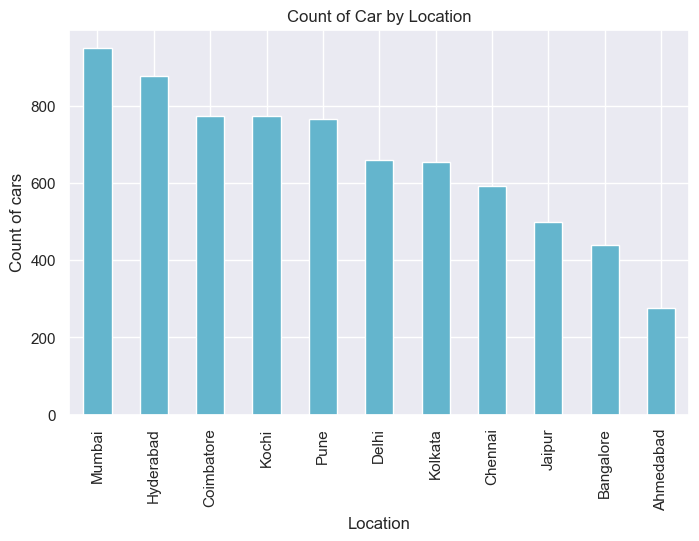

In [170]:
location_count = df['Location'].value_counts()
plt.figure(figsize=(8,5))
location_count.plot(kind = 'bar',color = 'c')


plt.title('Count of Car by Location')
plt.xlabel('Location')
plt.ylabel('Count of cars')


plt.show()

2. Fuel Type

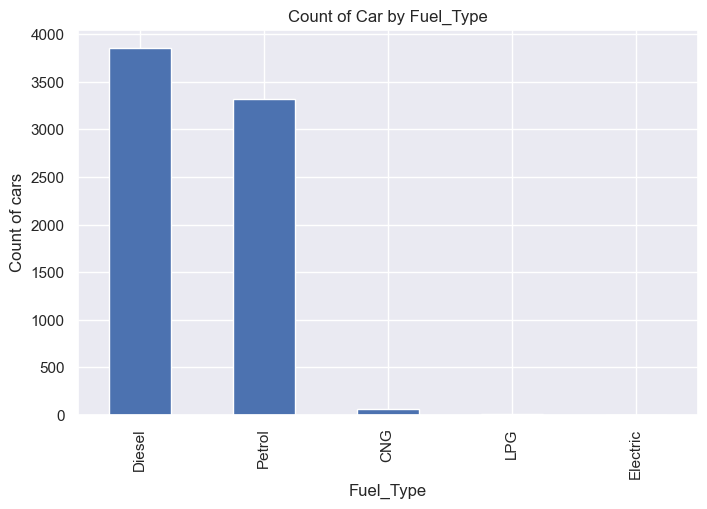

In [171]:
location_count = df['Fuel_Type'].value_counts()
plt.figure(figsize=(8,5))
location_count.plot(kind = 'bar',color = 'b')


plt.title('Count of Car by Fuel_Type')
plt.xlabel('Fuel_Type')
plt.ylabel('Count of cars')


plt.show()

3. Manufacturer

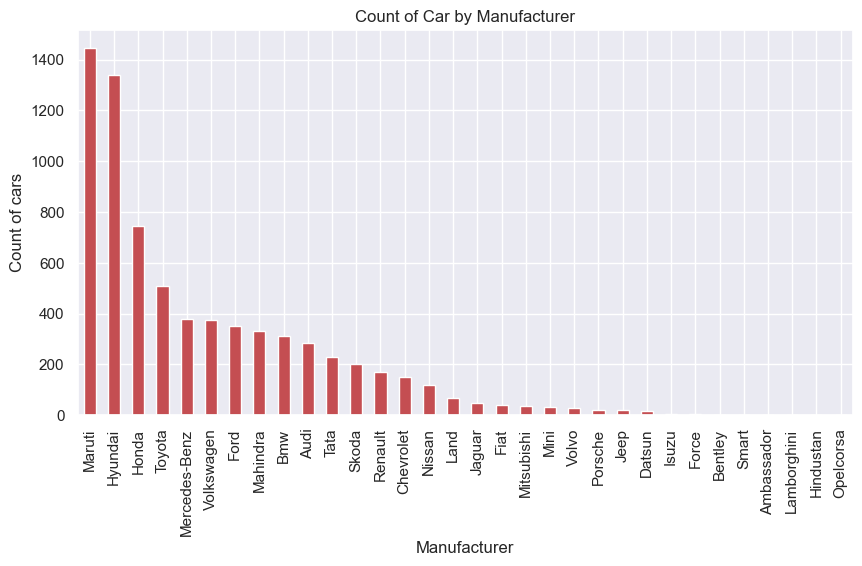

In [172]:
location_count = df['Manufacturer'].value_counts()
plt.figure(figsize=(10,5))
location_count.plot(kind = 'bar',color = 'r')


plt.title('Count of Car by Manufacturer')
plt.xlabel('Manufacturer')
plt.ylabel('Count of cars')


plt.show()

4. Transmission

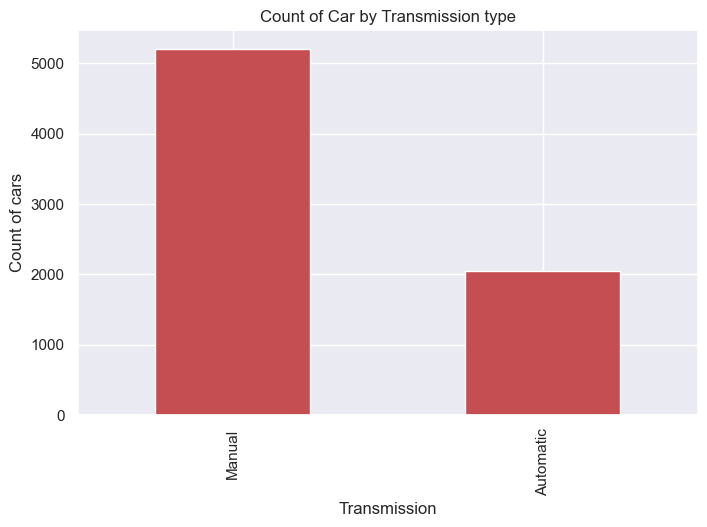

In [173]:
car_count_Transmission = df['Transmission'].value_counts()
plt.figure(figsize=(8,5))
car_count_Transmission.plot(kind = 'bar',color = 'r')

plt.title('Count of Car by Transmission type')
plt.xlabel('Transmission')
plt.ylabel('Count of cars')

plt.show()

5. Owner Type

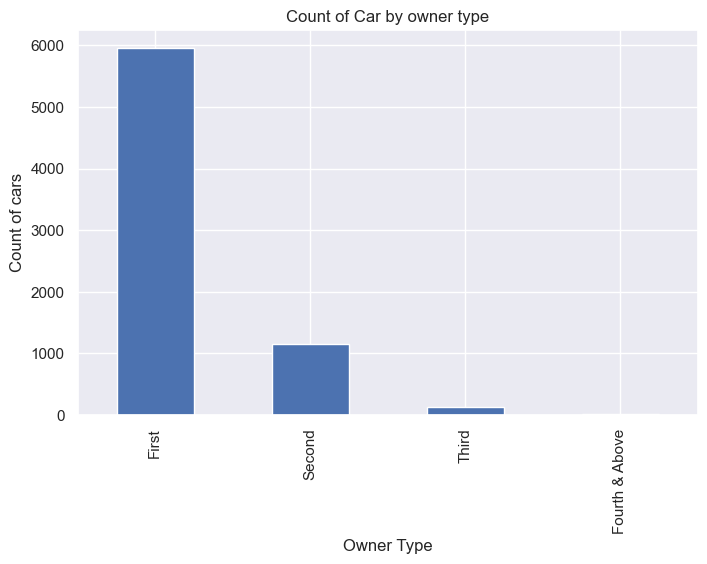

In [174]:
car_count_owner_Type = df['Owner_Type'].value_counts()
plt.figure(figsize=(8,5))
car_count_owner_Type.plot(kind = 'bar',color = 'b')


plt.title('Count of Car by owner type')
plt.xlabel('Owner Type')
plt.ylabel('Count of cars')


plt.show()

6.Seats

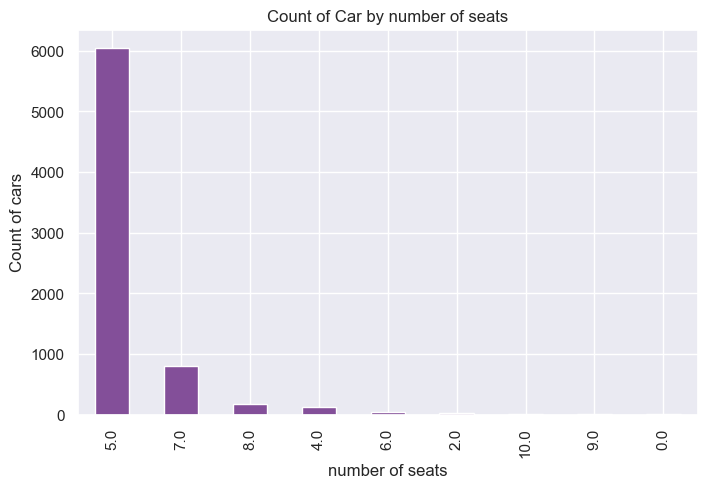

In [175]:
car_count_number_of_seats = df['Seats'].value_counts()
plt.figure(figsize=(8,5))
car_count_number_of_seats.plot(kind = 'bar')

plt.title('Count of Car by number of seats')
plt.xlabel('number of seats')
plt.ylabel('Count of cars')

plt.show()

7. Year

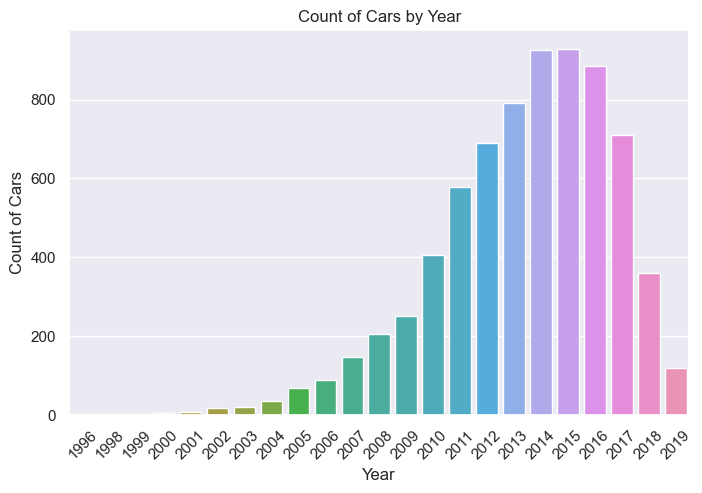

In [176]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Year')

plt.title('Count of Cars by Year')
plt.xlabel('Year')
plt.ylabel('Count of Cars')

plt.xticks(rotation=45)

plt.show()

8. Distribution of continious features

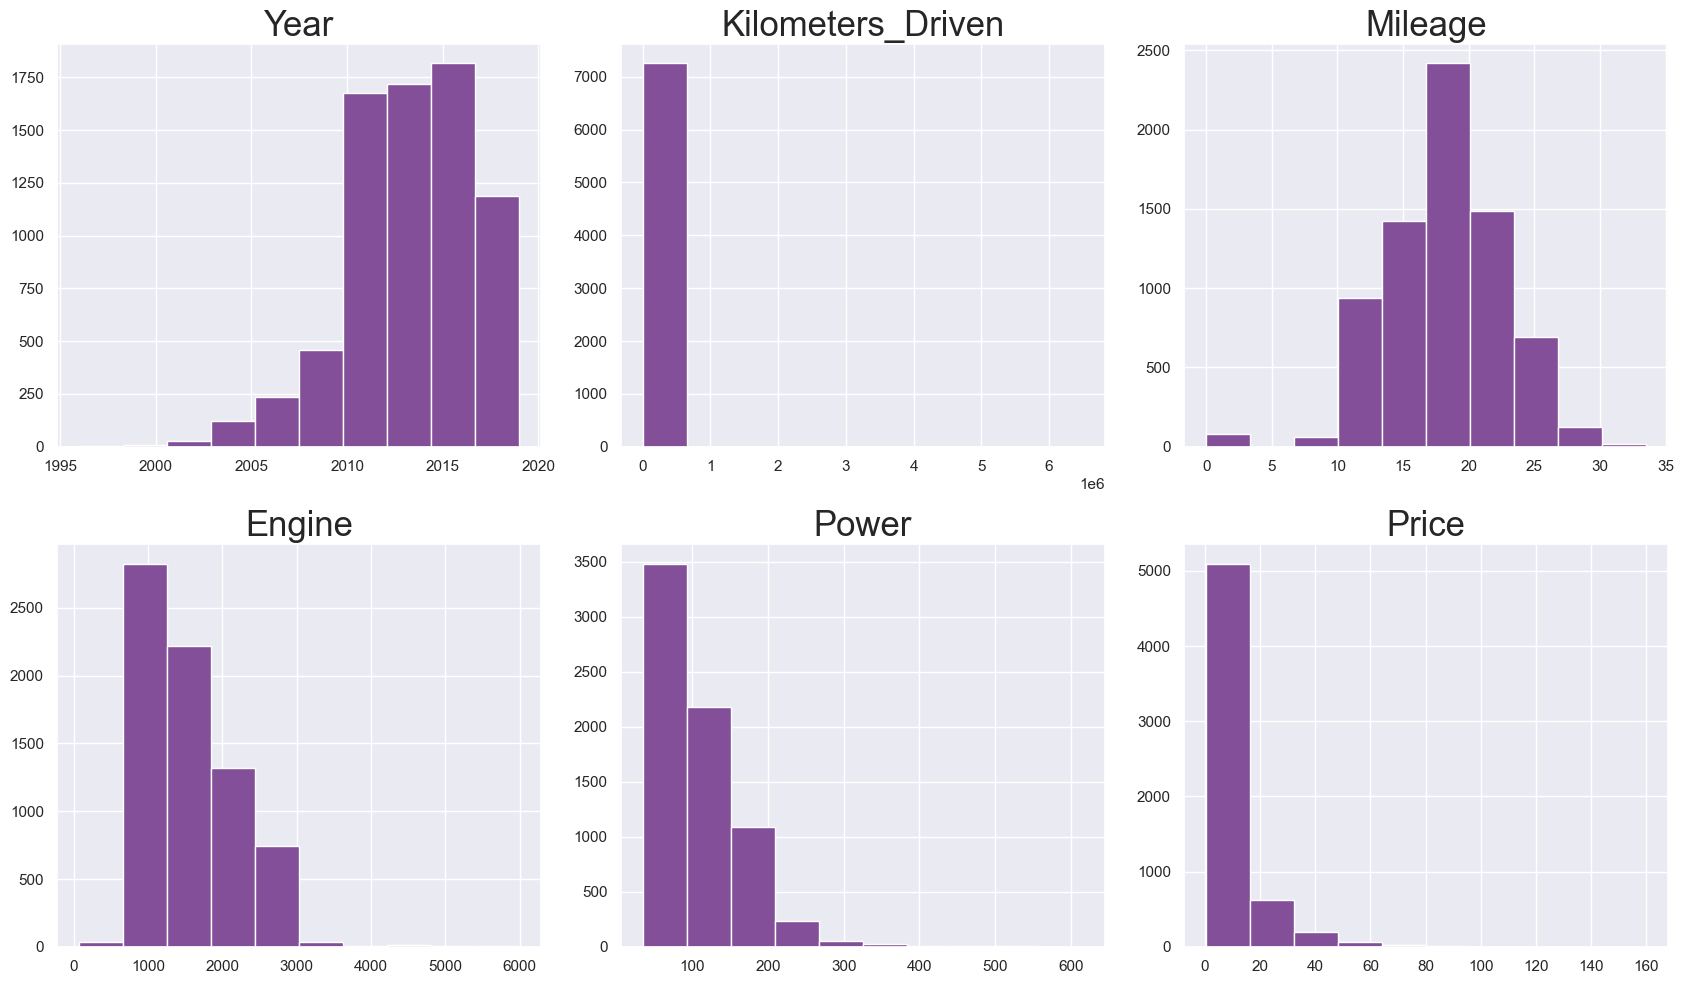

In [177]:
num_col = df.select_dtypes(include=np.number).columns.tolist()
num_col.remove("Seats")  

plt.figure(figsize=(17,10))

for i in range(len(num_col)):
    plt.subplot(2, 3, i + 1)
    plt.hist(df[num_col[i]])
    plt.tight_layout()
    plt.title(num_col[i], fontsize=25)

plt.show()

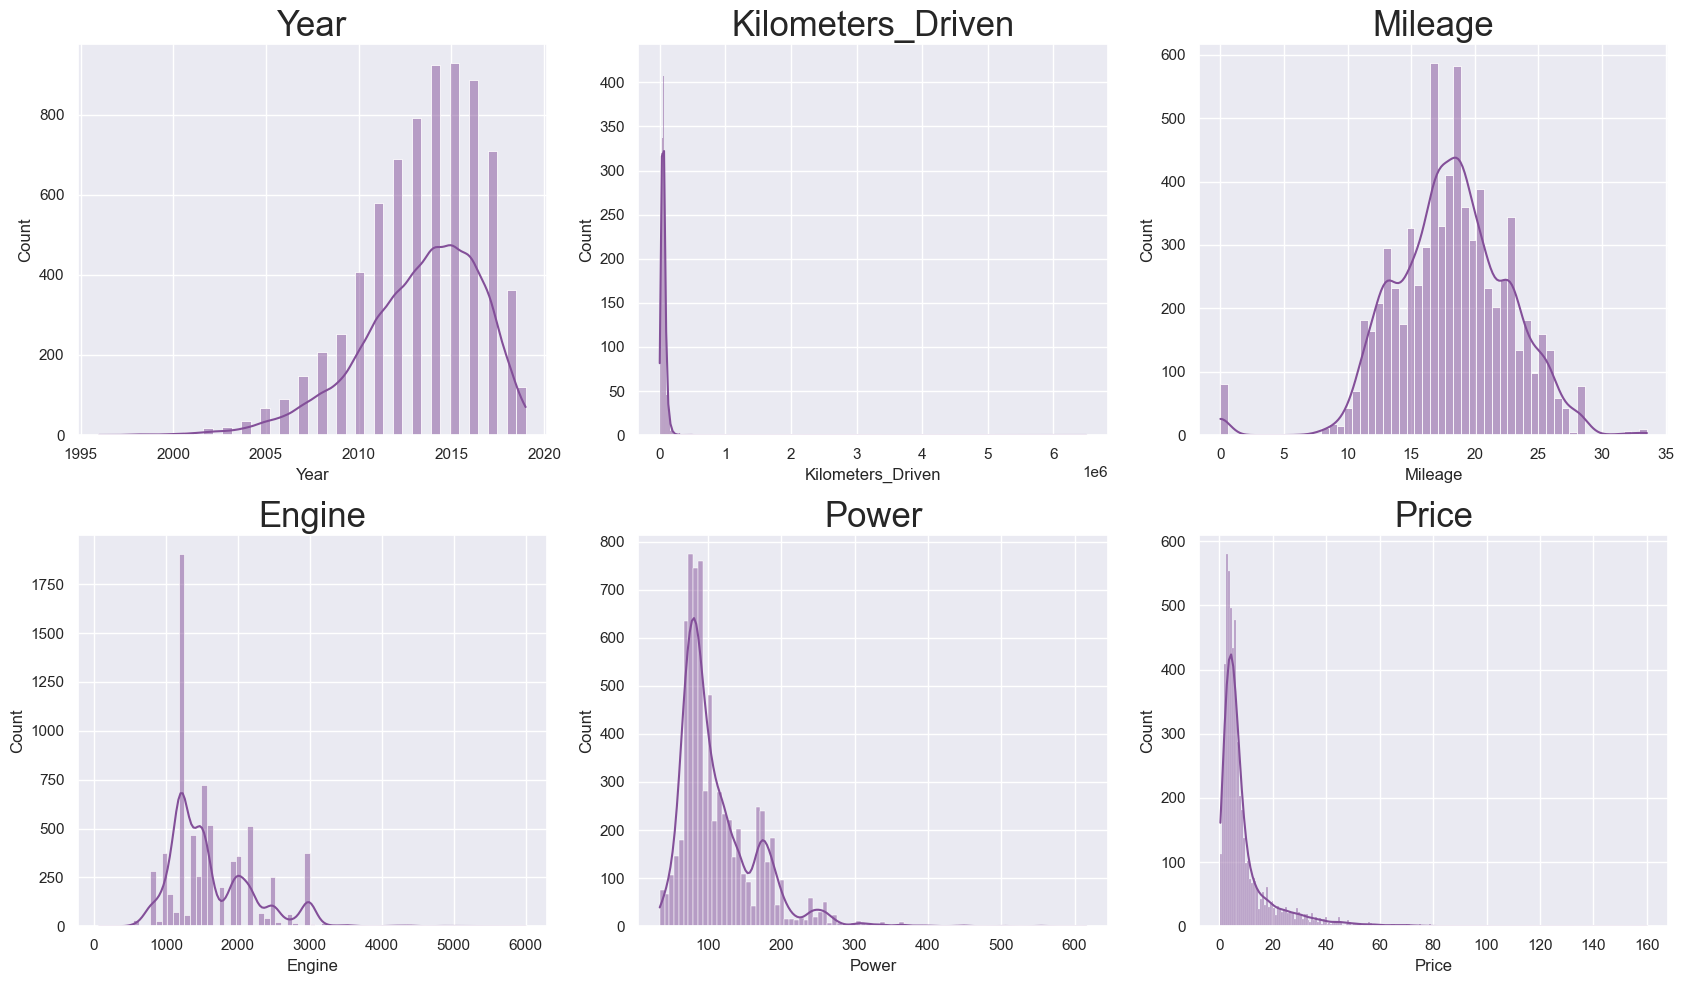

In [178]:
plt.figure(figsize=(17, 10))

for i in range(len(num_col)):
    plt.subplot(2, 3, i + 1)
    sns.histplot(df[num_col[i]], kde=True)  
    plt.tight_layout()
    plt.title(num_col[i], fontsize=25)

plt.show()


Bivariate Analysis

In [179]:

df["Price_bin"] = pd.cut(
    df["Price"],
    [-np.inf, 1, 5, 10, 15, 19, np.inf,],
    labels=["<1L", "1-5L", "5-10L", "10-15L", "15-19L", ">19L"],
)

In [180]:
df["Price_bin"].value_counts()

Price_bin
1-5L      2568
5-10L     1877
>19L       740
10-15L     498
15-19L     244
<1L         92
Name: count, dtype: int64

In [181]:
df.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Manufacturer,Price_bin
S.No.,,,,,,,,,,,,,
0,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75,Maruti,1-5L
1,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,Hyundai,10-15L
2,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50,Honda,1-5L
3,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00,Maruti,5-10L
4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74,Audi,15-19L


1. Cars By Price

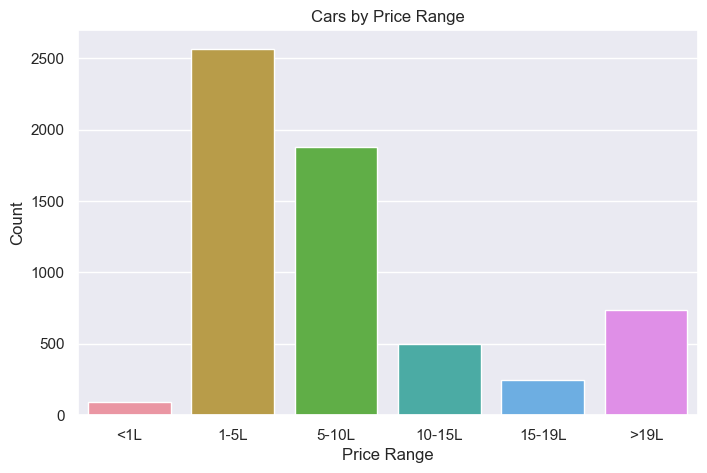

In [182]:
plt.figure(figsize=(8, 5))
count_data = df["Price_bin"].value_counts()
ax = sns.barplot(x=count_data.index, y=count_data)
ax.set_title("Cars by Price Range")
ax.set_xlabel("Price Range")
ax.set_ylabel("Count")

plt.show()

2. Price by Manufacturing Year

<Axes: xlabel='Year', ylabel='Price'>

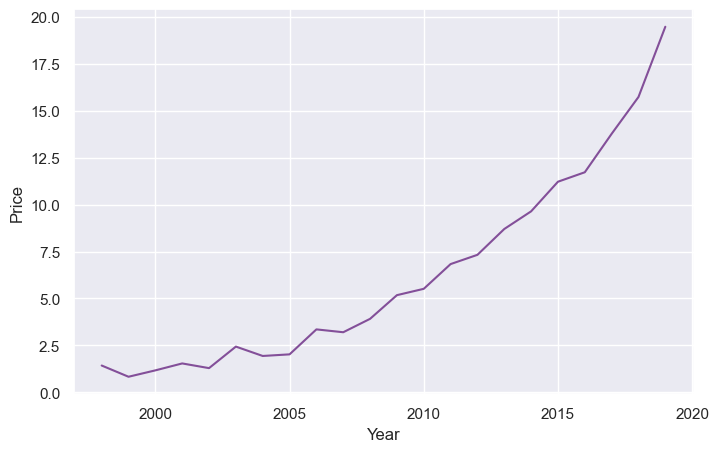

In [183]:
plt.figure(figsize=(8, 5))

sns.lineplot(y="Price", x="Year", data=df, ci=None)

3. Price Vs Kilometers Driven

<Axes: xlabel='Kilometers_Driven', ylabel='Price'>

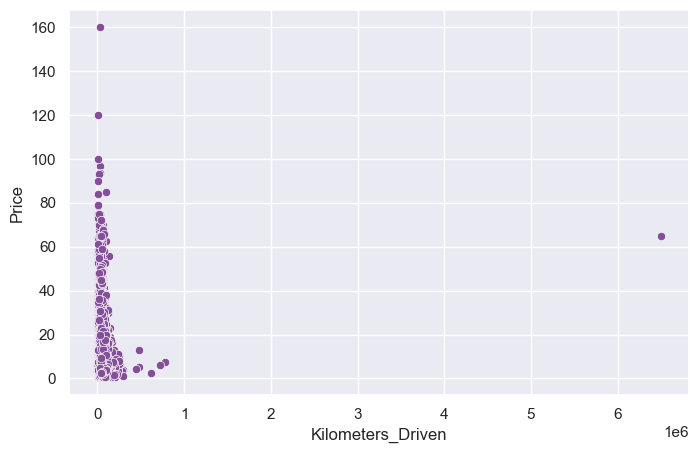

In [184]:
plt.figure(figsize=(8, 5))

sns.scatterplot(y="Price", x="Kilometers_Driven", data=df)

4. Price Vs Engine

<Axes: xlabel='Engine', ylabel='Price'>

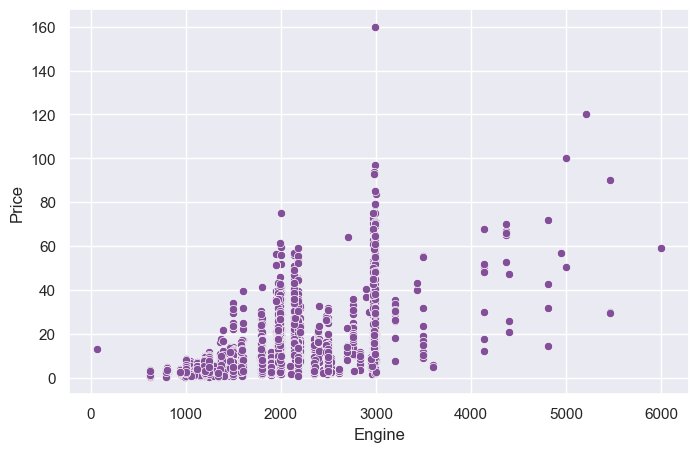

In [185]:
plt.figure(figsize=(8, 5))

sns.scatterplot(y="Price", x="Engine", data=df)

5. Price vs Power

<Axes: xlabel='Power', ylabel='Price'>

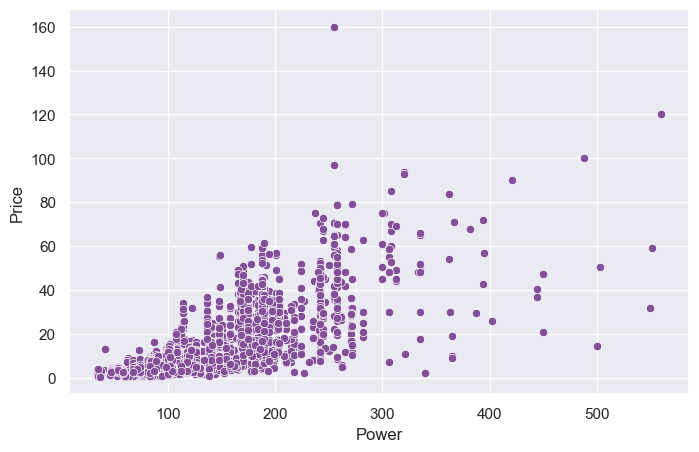

In [186]:
plt.figure(figsize=(8, 5))

sns.scatterplot(y="Price", x="Power", data=df)

6. Price vs Millage

<Axes: xlabel='Mileage', ylabel='Price'>

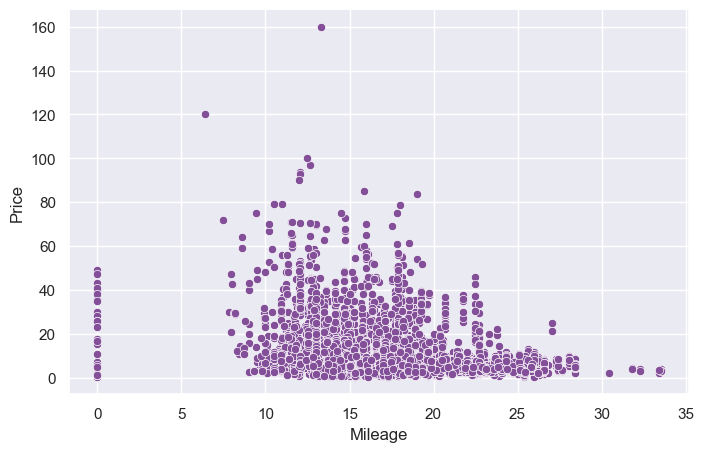

In [187]:
plt.figure(figsize=(8, 5))

sns.scatterplot(y="Price", x="Mileage", data=df)

7. Price vs Owner

<Axes: xlabel='Owner_Type', ylabel='Price'>

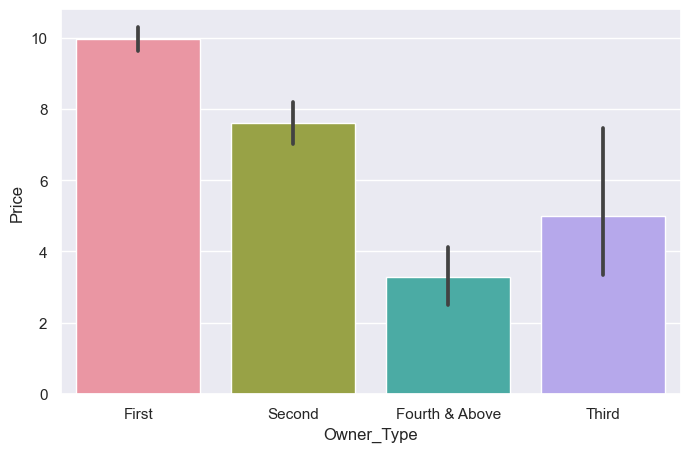

In [188]:
plt.figure(figsize=(8, 5))

sns.barplot(y="Price", x="Owner_Type", data=df)

8. Price Vs Transmission

<Axes: xlabel='Transmission', ylabel='Price'>

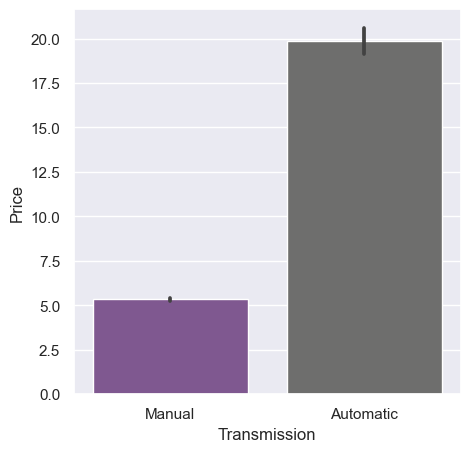

In [189]:
plt.figure(figsize=(5, 5))

sns.barplot(y="Price", x="Transmission", data=df)

9. Price Vs Seats

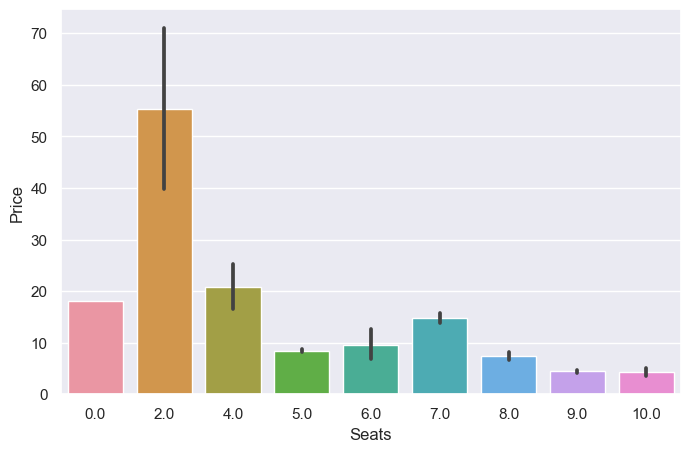

In [190]:
plt.figure(figsize=(8, 5))

sns.barplot(y="Price", x="Seats", data=df)
plt.show()

10. Price vs Location

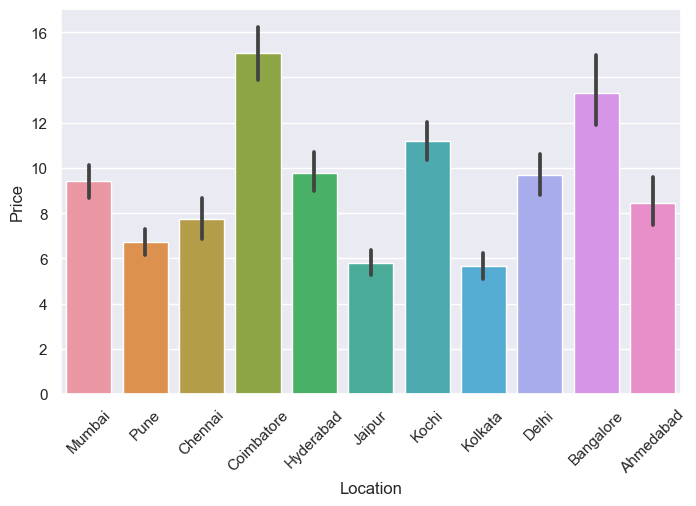

In [191]:
plt.figure(figsize=(8, 5))
sns.barplot(y="Price", x="Location", data=df)
plt.xticks(rotation=45)
plt.show()

# Multivariate Analysis

Correlation

In [192]:
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()
numeric_columns.remove("Year")  
numeric_columns.remove("Seats") 

In [193]:
corr = (
    df[numeric_columns].corr().sort_values(by=["Price"], ascending=False)
)  

<Axes: >

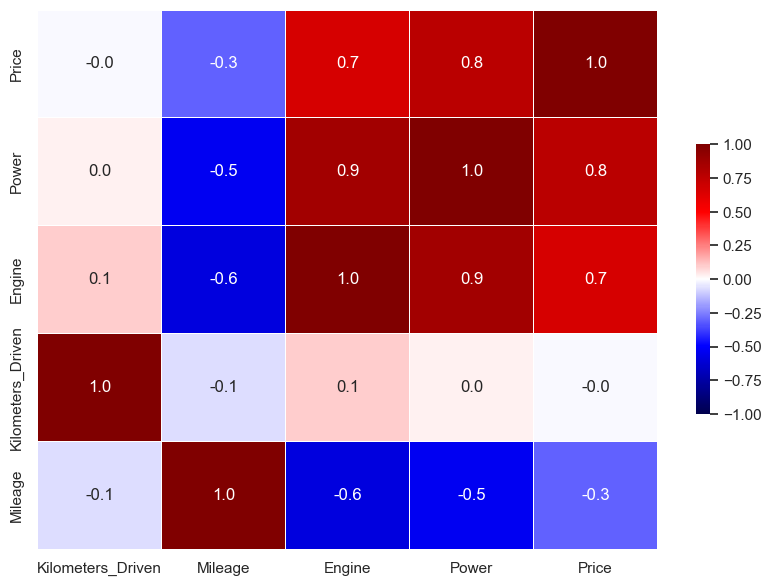

In [194]:
f, ax = plt.subplots(figsize=(10, 7))

sns.heatmap(
    corr,
    cmap="seismic",
    annot=True,
    fmt=".1f",
    vmin=-1,
    vmax=1,
    center=0,
    square=False,
    linewidths=0.7,
    cbar_kws={"shrink": 0.5},
)

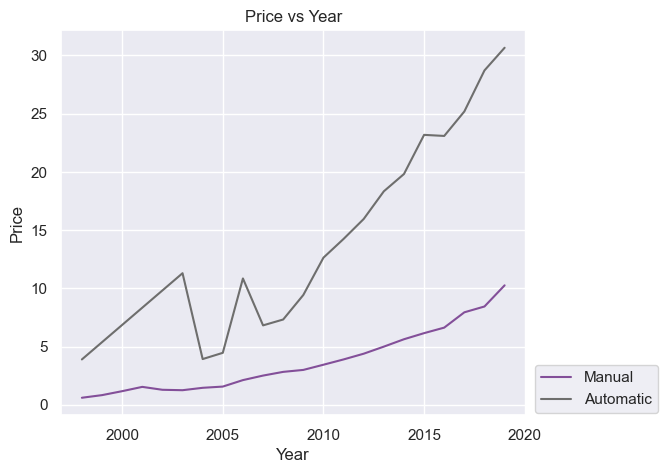

In [195]:
plt.figure(figsize=(6, 5))
sns.lineplot(
    y="Price", x="Year", data=df, ci=None, hue="Transmission"
)  
plt.title("Price vs Year")  
plt.legend(bbox_to_anchor=(1.3, 0.15))  
plt.show()

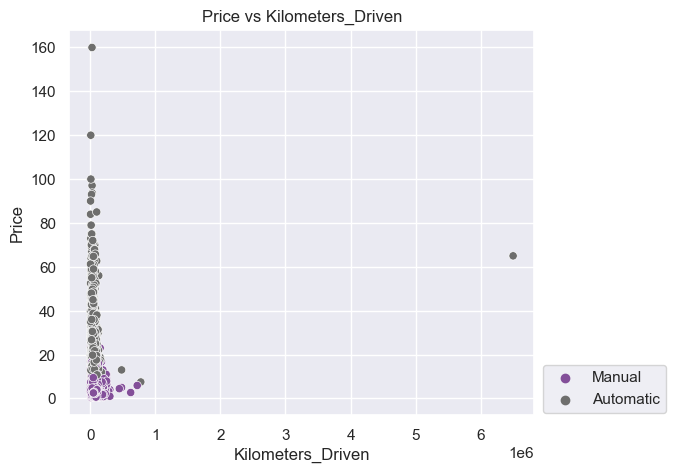

In [196]:
plt.figure(figsize=(6, 5))
sns.scatterplot(y="Price", x="Kilometers_Driven", data=df, hue="Transmission")
plt.title("Price vs Kilometers_Driven")
plt.legend(bbox_to_anchor=(1.3, 0.15))
plt.show()


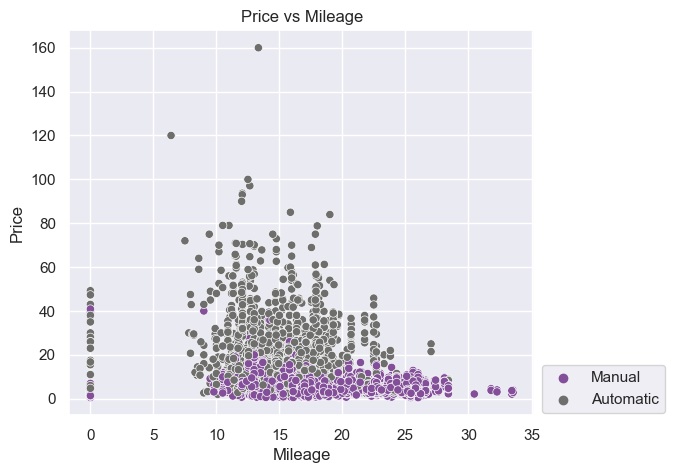

In [197]:
plt.figure(figsize=(6, 5))
sns.scatterplot(y="Price", x="Mileage", data=df, hue="Transmission")
plt.title("Price vs Mileage")
plt.legend(bbox_to_anchor=(1, 0.15))
plt.show()

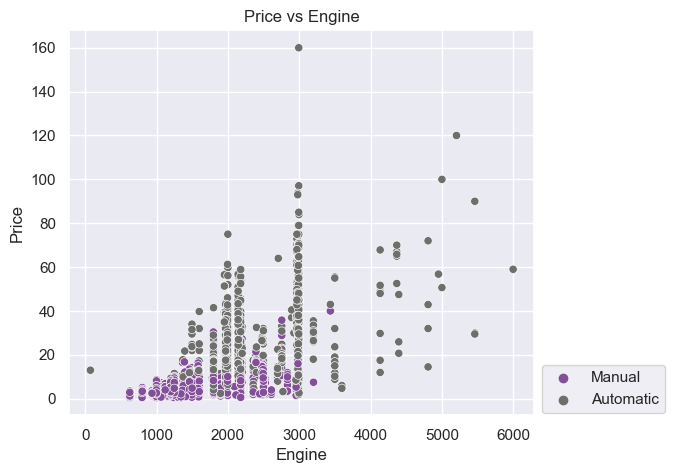

In [198]:
plt.figure(figsize=(6, 5))
sns.scatterplot(y="Price", x="Engine", data=df, hue="Transmission")
plt.title("Price vs Engine")
plt.legend(bbox_to_anchor=(1, 0.15))
plt.show()

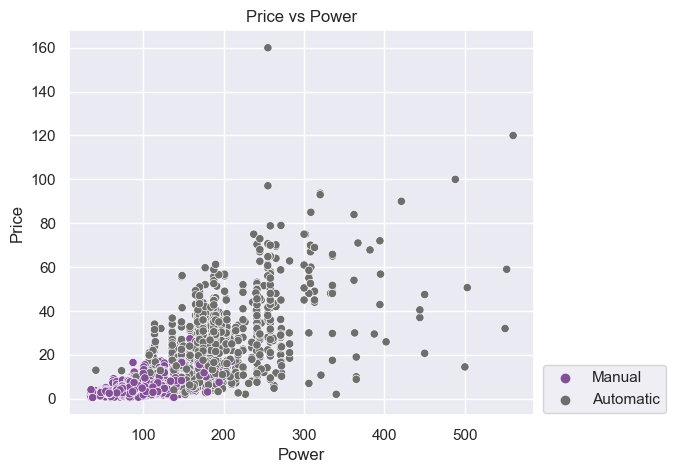

In [199]:
plt.figure(figsize=(6, 5))
sns.scatterplot(y="Price", x="Power", data=df, hue="Transmission")
plt.title("Price vs Power")
plt.legend(bbox_to_anchor=(1.3, 0.15))
plt.show()

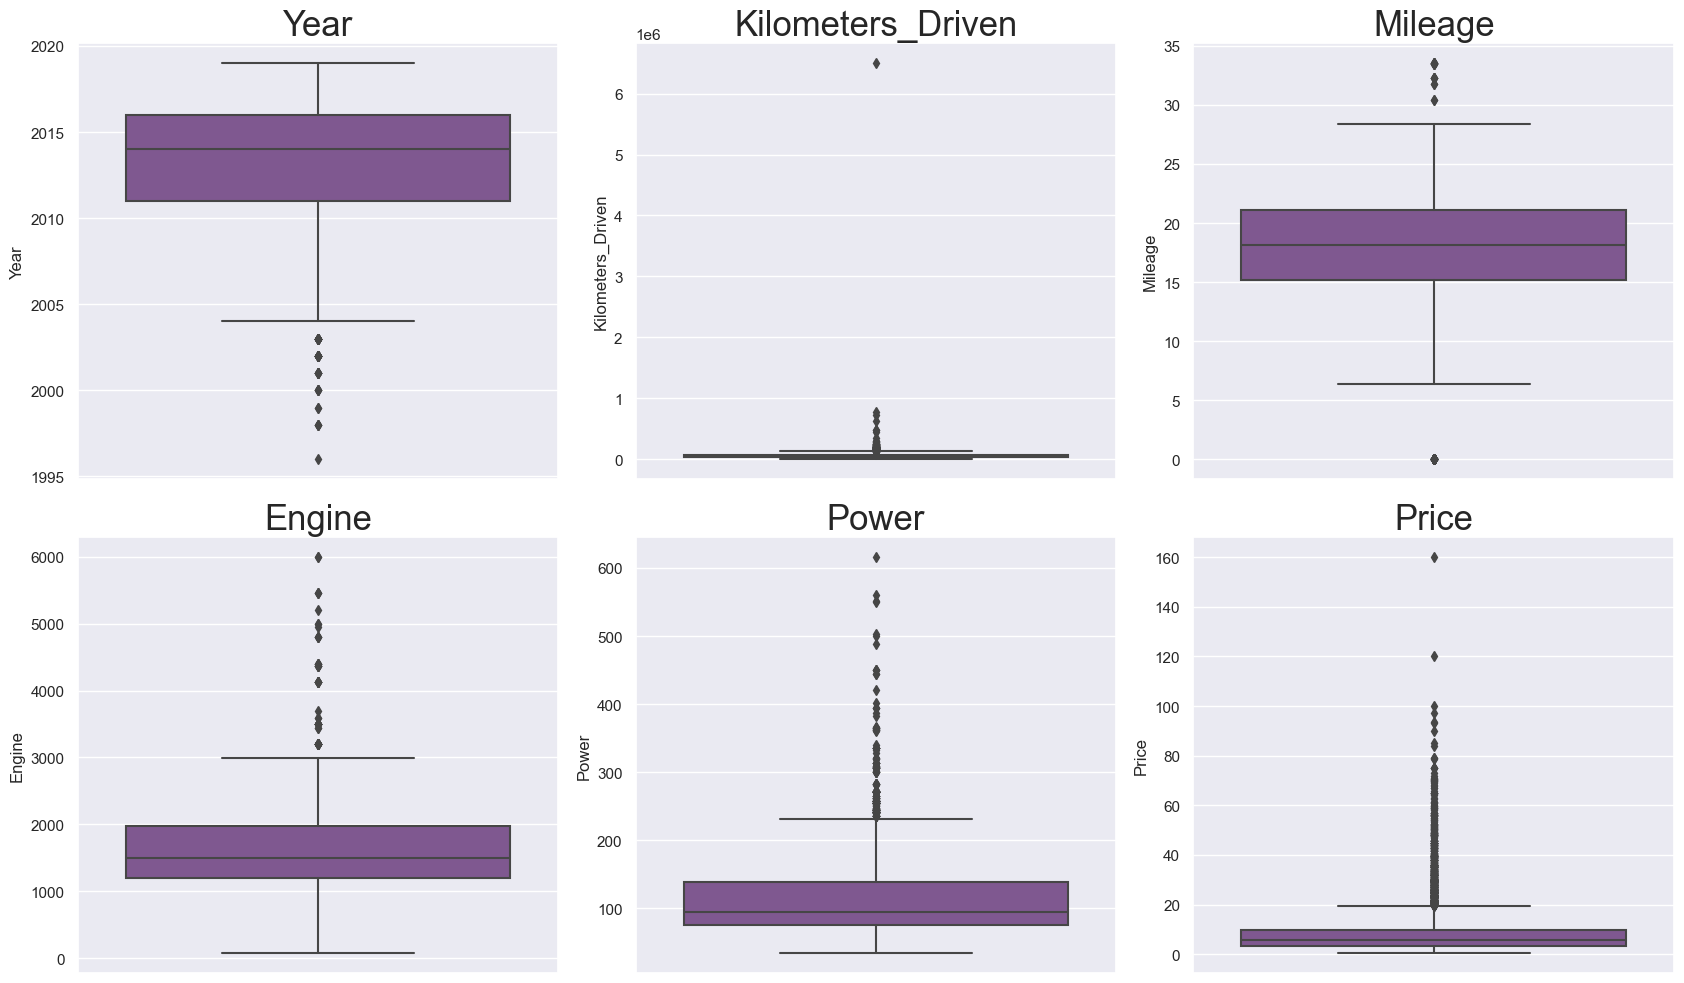

In [200]:
plt.figure(figsize=(17, 10))

for i in range(len(num_col)):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(y=df[num_col[i]])
    plt.tight_layout()
    plt.title(num_col[i], fontsize=25)

plt.show()


# Data Preprocessing

MIssing Value Treatment

In [52]:
df.isnull().sum()

Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                 175
Seats                  53
Price                1234
Manufacturer            0
Price_bin            1234
dtype: int64

In [53]:
df.dropna(axis=0, how="any", subset=["Price"], inplace=True)

In [54]:
df.shape

(6019, 13)

In [55]:
df.isnull().sum()

Location               0
Year                   0
Kilometers_Driven      0
Fuel_Type              0
Transmission           0
Owner_Type             0
Mileage                2
Engine                36
Power                143
Seats                 42
Price                  0
Manufacturer           0
Price_bin              0
dtype: int64

In [56]:
df.shape

(6019, 13)

In [57]:
df.isnull().sum(axis=1).sort_values(ascending=False).value_counts()

0    5872
1     107
3      36
2       4
Name: count, dtype: int64

In [58]:
df["Mileage"] = df["Mileage"].fillna(value=(df["Mileage"].median()))
df["Engine"] = df["Engine"].fillna(value=(df["Engine"].median()))
df["Power"] = df["Power"].fillna(value=(df["Power"].median()))
df["Seats"] = df["Seats"].fillna(value=(df["Seats"].median()))

In [59]:
df[df["Seats"] == 0]

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Manufacturer,Price_bin
S.No.,,,,,,,,,,,,,
3999,Hyderabad,2012,125000,Petrol,Automatic,First,10.5,3197.0,97.7,0.0,18.0,Audi,15-19L


In [60]:
df["Seats"] = df["Seats"].replace(0, 5)

In [61]:
df.isnull().sum()

Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
Manufacturer         0
Price_bin            0
dtype: int64

# Outliers in numerical column

In [62]:
num_col

['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Price']

In [63]:
num_col = df.select_dtypes(include=np.number).columns.tolist()
num_col.remove(
    "Price"
)

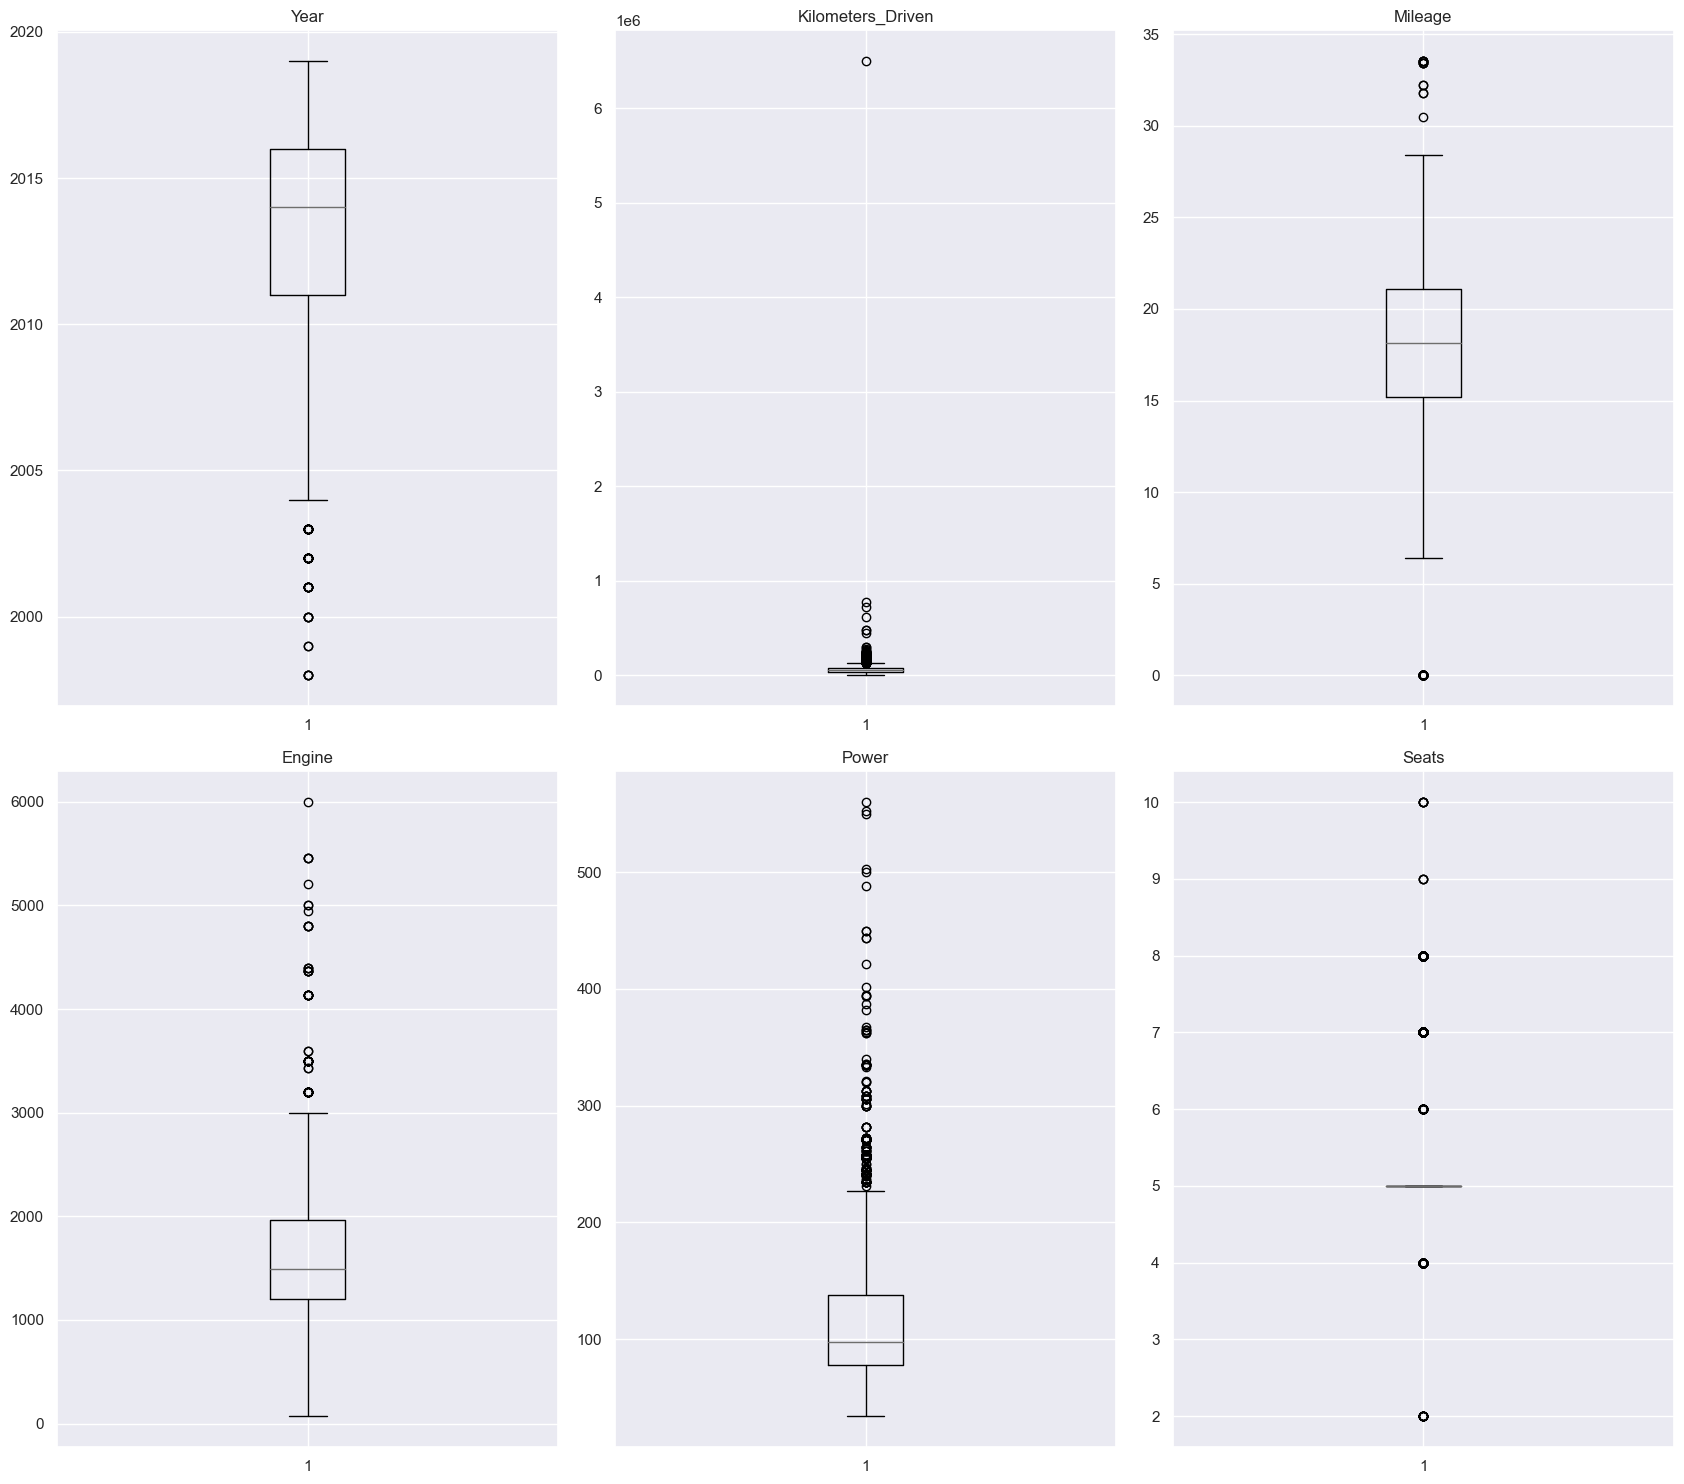

In [64]:
plt.figure(figsize=(17, 15))

for i, variable in enumerate(num_col):
    plt.subplot(2, 3, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

Outlier treatment

In [65]:

def treat_outliers(df, col):
    """
    treats outliers in a variable
    col: str, name of the numerical variable
    df: dataframe
    col: name of the column
    """

    Q1 = df[col].quantile(0.25)  
    Q3 = df[col].quantile(0.75)  
    IQR = Q3 - Q1
    Lower_whisker = Q1 - 1.5 * IQR
    Upper_whisker = Q3 + 1.5 * IQR


    df[col] = np.clip(df[col], Lower_whisker, Upper_whisker)

    return df


def treat_outliers_all(df, col_list):

    """
    treat outlier in all numerical variables
    col_list: list of numerical variables
    df: data frame
    """

    for c in col_list:
        df = treat_outliers(df, c)
    return df

In [66]:
num_col.remove("Seats")

In [67]:
df = treat_outliers_all(
    df, num_col
)  

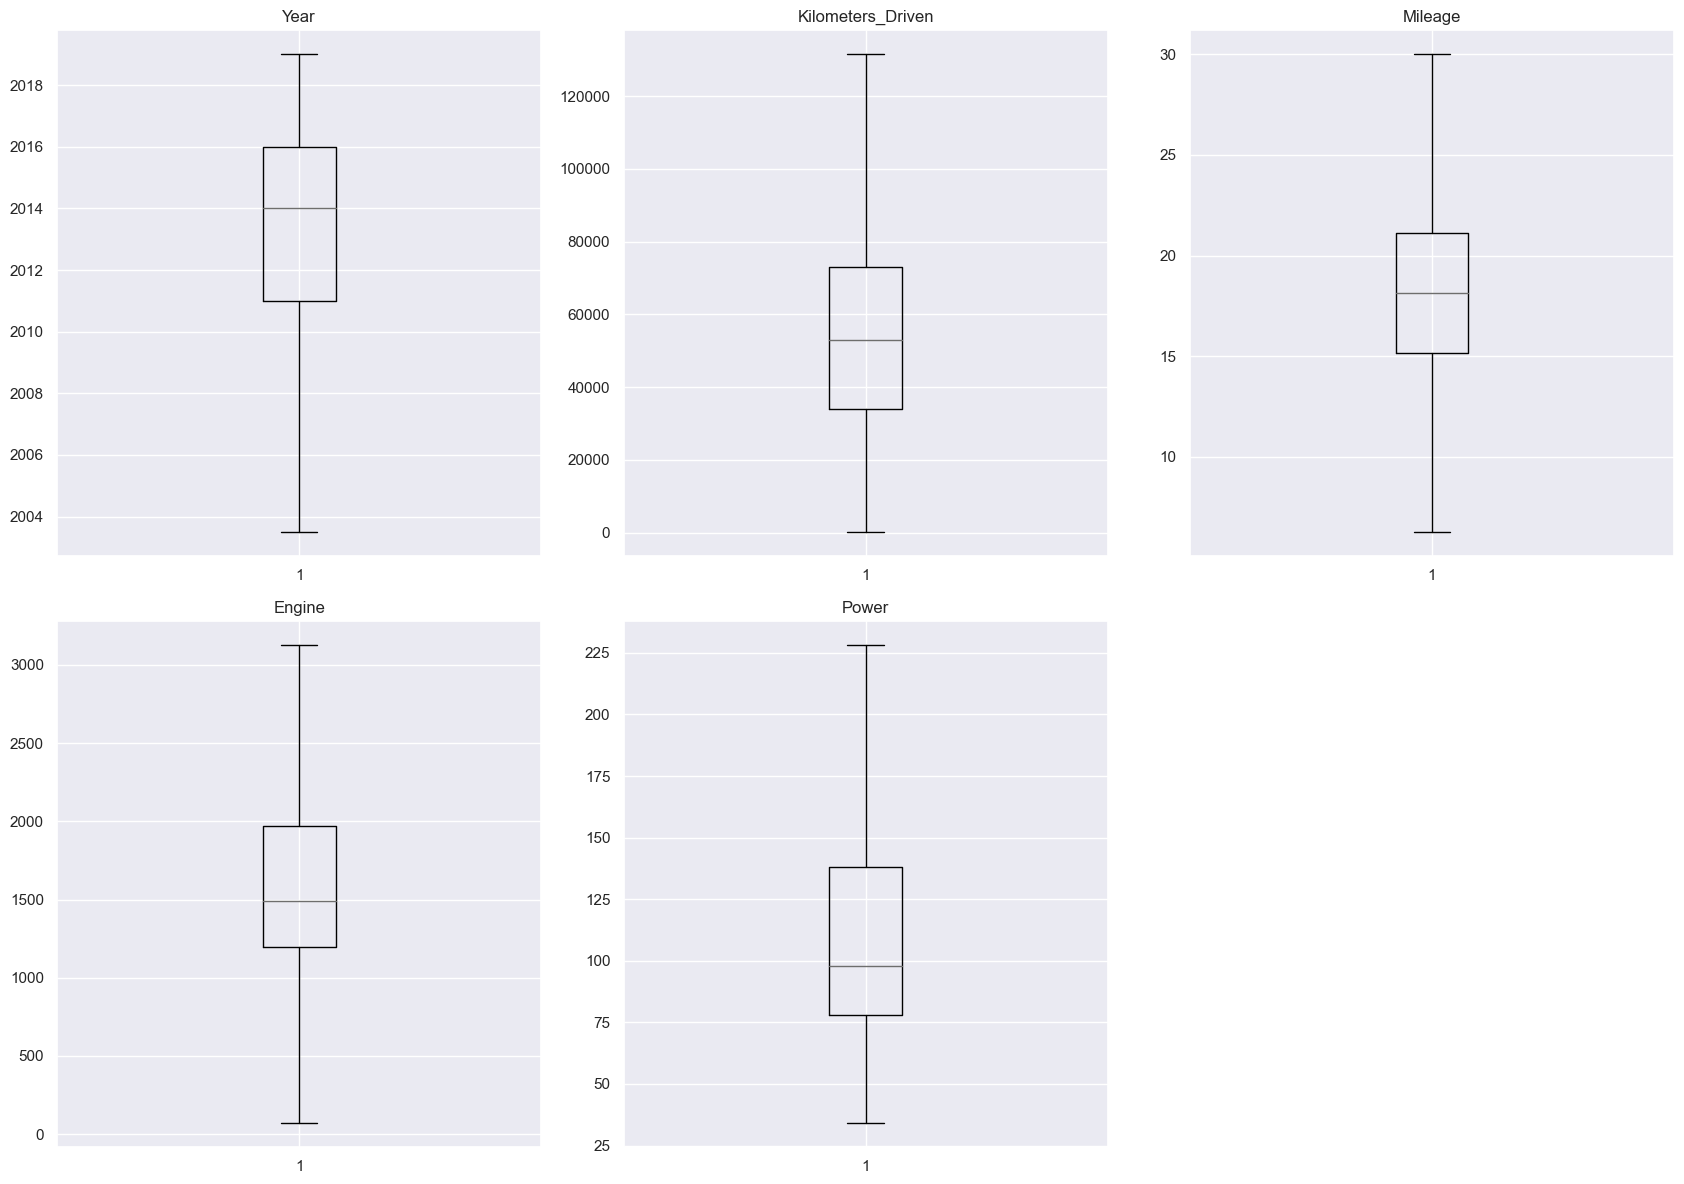

In [68]:
plt.figure(figsize=(17, 12))

for i, variable in enumerate(num_col):
    plt.subplot(2, 3, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()


# Feature Engineering

Categorizing object datatypes

In [69]:
df["Location"] = df["Location"].astype("category")
df["Fuel_Type"] = df["Fuel_Type"].astype("category")
df["Transmission"] = df["Transmission"].astype("category")
df["Owner_Type"] = df["Owner_Type"].astype("category")
df["Manufacturer"] = df["Manufacturer"].astype("category")

Scaling/Normalization of continuous features

In [70]:
from sklearn.preprocessing import StandardScaler


sc = StandardScaler()

df["Km_sc"] = sc.fit_transform(df[["Kilometers_Driven"]])
df["Mileage_sc"] = sc.fit_transform(df[["Mileage"]])
df["Engine_sc"] = sc.fit_transform(df[["Engine"]])
df["Power_sc"] = sc.fit_transform(df[["Power"]])


df["Log_Price"] = np.log(df["Price"])

In [71]:
df.dtypes

Location             category
Year                  float64
Kilometers_Driven       int64
Fuel_Type            category
Transmission         category
Owner_Type           category
Mileage               float64
Engine                float64
Power                 float64
Seats                 float64
Price                 float64
Manufacturer         category
Price_bin            category
Km_sc                 float64
Mileage_sc            float64
Engine_sc             float64
Power_sc              float64
Log_Price             float64
dtype: object

# Data Preparation and Model Building

In [72]:
df.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Manufacturer,Price_bin,Km_sc,Mileage_sc,Engine_sc,Power_sc,Log_Price
S.No.,,,,,,,,,,,,,,,,,,
0,Mumbai,2010.0,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75,Maruti,1-5L,0.529098,1.943857,-1.081849,-1.144344,0.559616
1,Pune,2015.0,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,Hyundai,10-15L,-0.502924,0.340328,-0.053308,0.333729,2.525729
2,Chennai,2011.0,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50,Honda,1-5L,-0.336469,0.000186,-0.727848,-0.480906,1.504077
3,Chennai,2012.0,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00,Maruti,5-10L,1.028463,0.594857,-0.641549,-0.479602,1.791759
4,Coimbatore,2013.0,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74,Audi,15-19L,-0.513910,-0.693983,0.626516,0.650893,2.875822


In [73]:
df.shape

(6019, 18)

In [74]:
from sklearn.preprocessing import OrdinalEncoder

oe = OrdinalEncoder(categories=[("<1L", "1-5L", "5-10L", "10-15L", "15-19L", ">19L")])
df["CarRank"] = oe.fit_transform(df[["Price_bin"]])

In [75]:
df.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Manufacturer,Price_bin,Km_sc,Mileage_sc,Engine_sc,Power_sc,Log_Price,CarRank
S.No.,,,,,,,,,,,,,,,,,,,
0,Mumbai,2010.0,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75,Maruti,1-5L,0.529098,1.943857,-1.081849,-1.144344,0.559616,1.0
1,Pune,2015.0,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,Hyundai,10-15L,-0.502924,0.340328,-0.053308,0.333729,2.525729,3.0
2,Chennai,2011.0,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50,Honda,1-5L,-0.336469,0.000186,-0.727848,-0.480906,1.504077,1.0
3,Chennai,2012.0,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00,Maruti,5-10L,1.028463,0.594857,-0.641549,-0.479602,1.791759,2.0
4,Coimbatore,2013.0,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74,Audi,15-19L,-0.513910,-0.693983,0.626516,0.650893,2.875822,4.0


In [76]:
df.columns

Index(['Location', 'Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission',
       'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats', 'Price',
       'Manufacturer', 'Price_bin', 'Km_sc', 'Mileage_sc', 'Engine_sc',
       'Power_sc', 'Log_Price', 'CarRank'],
      dtype='object')

# Defining X and y variables

In [134]:
X = df.drop(
    [
        "Kilometers_Driven",
        "Mileage",
        "Engine",
        "Power",
        "Manufacturer",
        "Price",
        "Price_bin",
        "Log_Price",
    ],
    axis=1,
)
y = df[["Log_Price"]]

print(X.head())
print(y.head())

         Location    Year Fuel_Type Transmission Owner_Type  Seats     Km_sc  \
S.No.                                                                          
0          Mumbai  2010.0       CNG       Manual      First    5.0  0.529098   
1            Pune  2015.0    Diesel       Manual      First    5.0 -0.502924   
2         Chennai  2011.0    Petrol       Manual      First    5.0 -0.336469   
3         Chennai  2012.0    Diesel       Manual      First    7.0  1.028463   
4      Coimbatore  2013.0    Diesel    Automatic     Second    5.0 -0.513910   

       Mileage_sc  Engine_sc  Power_sc  CarRank  
S.No.                                            
0        1.943857  -1.081849 -1.144344      1.0  
1        0.340328  -0.053308  0.333729      3.0  
2        0.000186  -0.727848 -0.480906      1.0  
3        0.594857  -0.641549 -0.479602      2.0  
4       -0.693983   0.626516  0.650893      4.0  
       Log_Price
S.No.           
0       0.559616
1       2.525729
2       1.504077
3   

In [135]:
print(X.shape)
print(y.shape)

(6019, 11)
(6019, 1)


# Creating Dummy Variable 

In [136]:
X = pd.get_dummies(
    X, columns=["Location", "Fuel_Type", "Transmission", "Owner_Type"], drop_first=True,dtype = float
)

In [137]:
X.head()

,Year,Seats,Km_sc,Mileage_sc,Engine_sc,Power_sc,CarRank,Location_Bangalore,Location_Chennai,Location_Coimbatore,...,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
S.No.,,,,,,,,,,,,,,,,,,,,,
0,2010.0,5.0,0.529098,1.943857,-1.081849,-1.144344,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,2015.0,5.0,-0.502924,0.340328,-0.053308,0.333729,3.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,2011.0,5.0,-0.336469,0.000186,-0.727848,-0.480906,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
3,2012.0,7.0,1.028463,0.594857,-0.641549,-0.479602,2.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,2013.0,5.0,-0.513910,-0.693983,0.626516,0.650893,4.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


# Train and Test Data

In [138]:
from sklearn.model_selection import train_test_split

In [139]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

In [140]:
X_train.head()

,Year,Seats,Km_sc,Mileage_sc,Engine_sc,Power_sc,CarRank,Location_Bangalore,Location_Chennai,Location_Coimbatore,...,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
S.No.,,,,,,,,,,,,,,,,,,,,,
4201,2011.0,5.0,0.695553,0.895663,-0.727848,-0.802415,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4383,2016.0,5.0,-1.203800,0.499987,-0.731370,-0.693797,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1779,2014.0,7.0,0.494575,-0.717122,0.998130,0.633514,2.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4020,2013.0,5.0,1.967103,1.619912,-0.641549,-0.800242,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3248,2011.0,5.0,0.088058,-0.400118,-0.729609,-0.802415,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


In [141]:
X_train.shape


(4213, 25)

# Choose train and evaluate the model

In [85]:
from sklearn.linear_model import LinearRegression

In [86]:
linear = LinearRegression()
linear.fit(X_train, y_train)

LinearRegression()

In [87]:
cf = pd.DataFrame(
    np.append(linear.coef_[0], linear.intercept_[0]),
    index=X_train.columns.tolist() + ["Intercept"],
    columns=["Coefficients"],
)
cf

,Coefficients
Year,0.079752
Seats,-0.013954
Km_sc,-0.023175
Mileage_sc,0.004740
Engine_sc,0.135410
Power_sc,0.190888
CarRank,0.305422
Location_Bangalore,0.081312
Location_Chennai,-0.007616
Location_Coimbatore,0.033509


# Model Performance Check

In [88]:

def mape(targets, predictions):
    return np.mean(np.abs((targets - predictions)) / targets) * 100



def model_perf(model, inp, out):
    y_pred = np.exp(model.predict(inp).flatten())
    y_act = np.exp(out.values.flatten())

    return pd.DataFrame(
        {
            "MAE": mean_absolute_error(y_act, y_pred),
            "MAPE": mape(y_act, y_pred),
            "RMSE": np.sqrt(mean_squared_error(y_act, y_pred)),
            "R^2": r2_score(y_act, y_pred),
        },
        index=[0],
    )

In [89]:
print("Train Performance")
model_perf(linear, X_train, y_train)

Train Performance


,MAE,MAPE,RMSE,R^2
0,1.724275,16.752936,4.401719,0.846314


In [90]:
print("Test Performance")
model_perf(linear, X_test, y_test)

Test Performance


,MAE,MAPE,RMSE,R^2
0,1.655029,17.378988,3.776753,0.884032


# Linear Regression using Statsmodels

In [91]:
import statsmodels.api as sm

In [92]:
X = sm.add_constant(X)
X_train1, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

In [93]:
olsmod0 = sm.OLS(y_train, X_train1)
olsres0 = olsmod0.fit()
print(olsres0.summary())

                            OLS Regression Results                            
Dep. Variable:              Log_Price   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                     2475.
Date:                Fri, 23 Jun 2023   Prob (F-statistic):               0.00
Time:                        08:45:00   Log-Likelihood:                 431.96
No. Observations:                4213   AIC:                            -811.9
Df Residuals:                    4187   BIC:                            -646.9
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

# Test for Multicollinearity - Variation Inflation Factor(VIF)

In [94]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [95]:
vif_series1 = pd.Series(
    [variance_inflation_factor(X.values, i) for i in range(X.shape[1])], index=X.columns
)
print("VIF Scores : \n\n{}\n".format(vif_series1))

VIF Scores : 

const                        974281.680473
Year                              2.499065
Seats                             1.780269
Km_sc                             1.948638
Mileage_sc                        3.211121
Engine_sc                         7.428543
Power_sc                          7.136644
CarRank                           4.996886
Location_Bangalore                2.477710
Location_Chennai                  2.991946
Location_Coimbatore               3.526992
Location_Delhi                    3.166905
Location_Hyderabad                3.837555
Location_Jaipur                   2.684908
Location_Kochi                    3.572195
Location_Kolkata                  3.158337
Location_Mumbai                   3.996683
Location_Pune                     3.441382
Fuel_Type_Diesel                 28.276124
Fuel_Type_Electric                1.044776
Fuel_Type_LPG                     1.192178
Fuel_Type_Petrol                 28.887461
Transmission_Manual               2.152

Observations

Let us now remove multicollinearity from the model. Engine,power,Fuel_type have high mutlicollinearity.but fuel_type is an important feature in model prediction. So will remove engine.

Removing Multicollinearity

Removing Engine

In [96]:
X_train2 = X_train1.drop("Engine_sc", axis=1)
vif_series1 = pd.Series(
    [variance_inflation_factor(X_train2.values, i) for i in range(X_train2.shape[1])],
    index=X_train2.columns,
)
print("VIF SCores : \n\n{}\n".format(vif_series1))

VIF SCores : 

const                        976901.397802
Year                              2.461412
Seats                             1.582515
Km_sc                             1.919657
Mileage_sc                        2.828860
Power_sc                          4.567039
CarRank                           4.966064
Location_Bangalore                2.586677
Location_Chennai                  3.000041
Location_Coimbatore               3.589859
Location_Delhi                    3.246941
Location_Hyderabad                3.904053
Location_Jaipur                   2.693083
Location_Kochi                    3.649405
Location_Kolkata                  3.232131
Location_Mumbai                   4.040745
Location_Pune                     3.519257
Fuel_Type_Diesel                 28.473290
Fuel_Type_Electric                1.035994
Fuel_Type_LPG                     1.223444
Fuel_Type_Petrol                 29.077030
Transmission_Manual               2.145527
Owner_Type_Fourth & Above         1.009

In [97]:
olsmod1 = sm.OLS(y_train, X_train2)
olsres1 = olsmod1.fit()
print(olsres1.summary())

                            OLS Regression Results                            
Dep. Variable:              Log_Price   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     2447.
Date:                Fri, 23 Jun 2023   Prob (F-statistic):               0.00
Time:                        08:45:01   Log-Likelihood:                 328.38
No. Observations:                4213   AIC:                            -606.8
Df Residuals:                    4188   BIC:                            -448.1
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Removing Power

In [98]:
X_train3 = X_train1.drop("Power_sc", axis=1)
vif_series3 = pd.Series(
    [variance_inflation_factor(X_train3.values, i) for i in range(X_train3.shape[1])],
    index=X_train3.columns,
)
print("VIF Scores: \n\n{}\n".format(vif_series3))

VIF Scores: 

const                        968187.276546
Year                              2.440723
Seats                             1.683831
Km_sc                             1.927484
Mileage_sc                        3.361610
Engine_sc                         4.955597
CarRank                           4.166324
Location_Bangalore                2.586701
Location_Chennai                  2.999782
Location_Coimbatore               3.589295
Location_Delhi                    3.246546
Location_Hyderabad                3.896732
Location_Jaipur                   2.692238
Location_Kochi                    3.649736
Location_Kolkata                  3.226853
Location_Mumbai                   4.041825
Location_Pune                     3.519039
Fuel_Type_Diesel                 28.485204
Fuel_Type_Electric                1.042408
Fuel_Type_LPG                     1.225587
Fuel_Type_Petrol                 29.265266
Transmission_Manual               2.012561
Owner_Type_Fourth & Above         1.0097

In [99]:
olsmod2 = sm.OLS(y_train, X_train3)
olsres2 = olsmod2.fit()
print(olsres2.summary())

                            OLS Regression Results                            
Dep. Variable:              Log_Price   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     2313.
Date:                Fri, 23 Jun 2023   Prob (F-statistic):               0.00
Time:                        08:45:01   Log-Likelihood:                 218.38
No. Observations:                4213   AIC:                            -386.8
Df Residuals:                    4188   BIC:                            -228.1
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Observation

R^2 is 0.930. Hence, we proceed with oldmod1

Continuing with olsmod1

In [100]:
olsmod1 = sm.OLS(y_train, X_train2)
olsres1 = olsmod1.fit()
print(olsres1.summary())

                            OLS Regression Results                            
Dep. Variable:              Log_Price   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     2447.
Date:                Fri, 23 Jun 2023   Prob (F-statistic):               0.00
Time:                        08:45:01   Log-Likelihood:                 328.38
No. Observations:                4213   AIC:                            -606.8
Df Residuals:                    4188   BIC:                            -448.1
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [101]:
X_train4 = X_train2.drop("Location_Chennai", axis=1)

In [102]:
olsmod3 = sm.OLS(y_train, X_train4)
olsres3 = olsmod3.fit()
print(olsres3.summary())

                            OLS Regression Results                            
Dep. Variable:              Log_Price   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     2554.
Date:                Fri, 23 Jun 2023   Prob (F-statistic):               0.00
Time:                        08:45:01   Log-Likelihood:                 328.37
No. Observations:                4213   AIC:                            -608.7
Df Residuals:                    4189   BIC:                            -456.4
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [103]:
X_train5 = X_train4.drop("Location_Mumbai", axis=1)

In [104]:
olsmod4 = sm.OLS(y_train, X_train5)
olsres4 = olsmod4.fit()
print(olsres4.summary())

                            OLS Regression Results                            
Dep. Variable:              Log_Price   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     2670.
Date:                Fri, 23 Jun 2023   Prob (F-statistic):               0.00
Time:                        08:45:01   Log-Likelihood:                 327.98
No. Observations:                4213   AIC:                            -610.0
Df Residuals:                    4190   BIC:                            -464.0
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [105]:
X_train6 = X_train5.drop("Owner_Type_Fourth & Above", axis=1)

In [106]:
olsmod5 = sm.OLS(y_train, X_train6)
olsres5 = olsmod5.fit()
print(olsres5.summary())

                            OLS Regression Results                            
Dep. Variable:              Log_Price   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     2798.
Date:                Fri, 23 Jun 2023   Prob (F-statistic):               0.00
Time:                        08:45:01   Log-Likelihood:                 327.90
No. Observations:                4213   AIC:                            -611.8
Df Residuals:                    4191   BIC:                            -472.2
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                -158.4818    

In [107]:
X_train7 = X_train6.drop("Fuel_Type_Petrol", axis=1)

In [108]:
olsmod6 = sm.OLS(y_train, X_train7)
olsres6 = olsmod6.fit()
print(olsres6.summary())

                            OLS Regression Results                            
Dep. Variable:              Log_Price   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     2937.
Date:                Fri, 23 Jun 2023   Prob (F-statistic):               0.00
Time:                        08:45:01   Log-Likelihood:                 327.33
No. Observations:                4213   AIC:                            -612.7
Df Residuals:                    4192   BIC:                            -479.4
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                -158.3676    

In [109]:
X_train8 = X_train7.drop("Fuel_Type_LPG", axis=1)

In [110]:
olsmod7 = sm.OLS(y_train, X_train8)
olsres7 = olsmod7.fit()
print(olsres7.summary())

                            OLS Regression Results                            
Dep. Variable:              Log_Price   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     3092.
Date:                Fri, 23 Jun 2023   Prob (F-statistic):               0.00
Time:                        08:45:01   Log-Likelihood:                 326.86
No. Observations:                4213   AIC:                            -613.7
Df Residuals:                    4193   BIC:                            -486.8
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                -158.5091    

In [111]:
X_train9 = X_train8.drop("Location_Delhi", axis=1)

In [112]:
olsmod8 = sm.OLS(y_train, X_train9)
olsres8 = olsmod8.fit()
print(olsres8.summary())

                            OLS Regression Results                            
Dep. Variable:              Log_Price   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     3262.
Date:                Fri, 23 Jun 2023   Prob (F-statistic):               0.00
Time:                        08:45:01   Log-Likelihood:                 325.31
No. Observations:                4213   AIC:                            -612.6
Df Residuals:                    4194   BIC:                            -492.1
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                -158.2950    

Observation

Now no feature has p-value greater than 0.05. Hence,the features in X_train9 are the final ones and olsres8 is the final model.

# Residual Mean

In [113]:
residual = olsres8.resid
np.mean(residual)

1.770449704503503e-13

Mean of residuals is very colse to 0

# Linearity Test

In [114]:
residual = olsres8.resid
fitted = olsres8.fittedvalues  

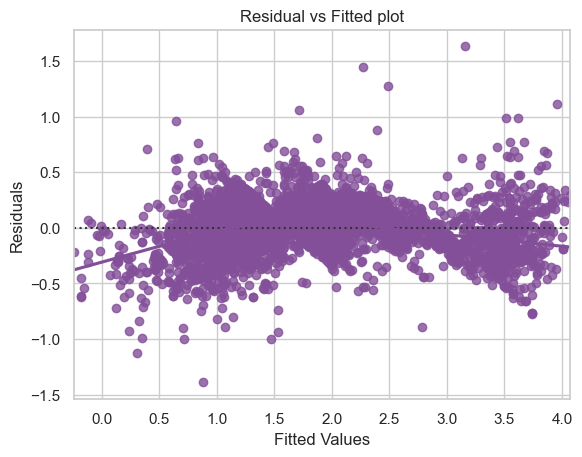

In [115]:
sns.set_style("whitegrid")
sns.residplot(x=fitted, y=residual, lowess=True)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residual vs Fitted plot")
plt.show()

# Test of Normality

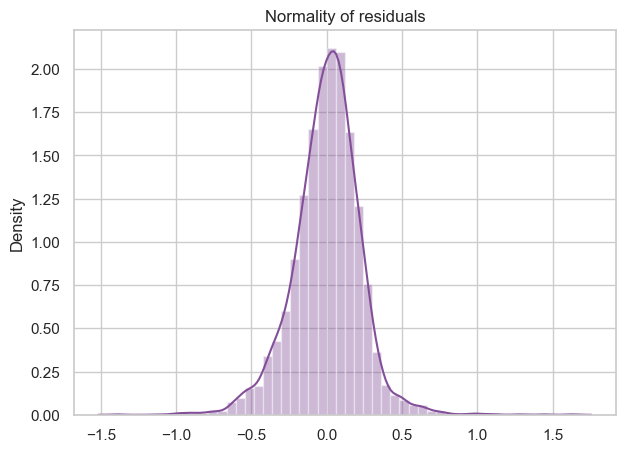

In [116]:
plt.figure(figsize=(7, 5))
sns.distplot(residual)
plt.title("Normality of residuals")
plt.show()

# QQ Probablity Plot

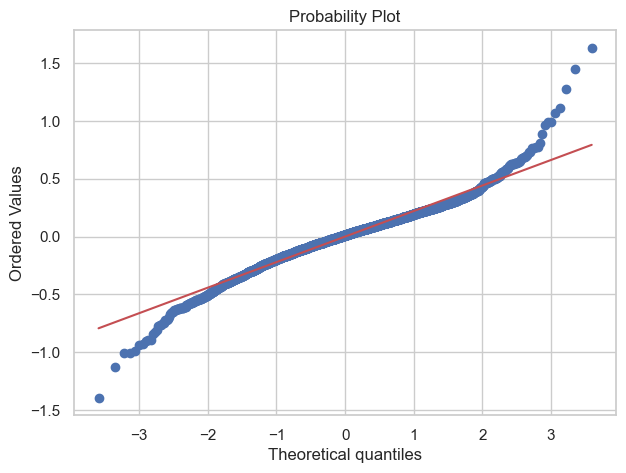

In [117]:
import pylab
import scipy.stats as stats

plt.figure(figsize=(7, 5))
stats.probplot(residual, dist="norm", plot=pylab)
plt.show()

In [118]:
stats.shapiro(residual)

ShapiroResult(statistic=0.9691205024719238, pvalue=3.4355448534646506e-29)

# Test for Homoscedasticity

For goldfeldquandt test, the hypothesis is defined as follows:

Null Hypothesis : Residuals are homoscedastic

Alternate Hypothesis : Residuals have heteroscedasticity

In [119]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(residual, X_train9)
lzip(name, test)

[('F statistic', 0.916662503605405), ('p-value', 0.9765669370108574)]

Observations

Since the p-value > 0.05, we can conclude that the residuals are homoscedastic. The assumption is therefore valid in the data.

# Predicting on Test Data

In [120]:
X_train9.columns

Index(['const', 'Year', 'Seats', 'Km_sc', 'Mileage_sc', 'Power_sc', 'CarRank',
       'Location_Bangalore', 'Location_Coimbatore', 'Location_Hyderabad',
       'Location_Jaipur', 'Location_Kochi', 'Location_Kolkata',
       'Location_Pune', 'Fuel_Type_Diesel', 'Fuel_Type_Electric',
       'Transmission_Manual', 'Owner_Type_Second', 'Owner_Type_Third'],
      dtype='object')

In [121]:
X_test_final = X_test[X_train9.columns]

In [122]:
X_test_final.head()

,const,Year,Seats,Km_sc,Mileage_sc,Power_sc,CarRank,Location_Bangalore,Location_Coimbatore,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Pune,Fuel_Type_Diesel,Fuel_Type_Electric,Transmission_Manual,Owner_Type_Second,Owner_Type_Third
S.No.,,,,,,,,,,,,,,,,,,,
2868,1.0,2013.0,5.0,0.429225,1.203411,-0.800242,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
5924,1.0,2017.0,7.0,-0.977621,-0.647705,0.199043,3.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3764,1.0,2014.0,7.0,0.995172,-0.717122,0.633514,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4144,1.0,2016.0,5.0,-0.136723,1.573634,-0.908643,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0
2780,1.0,2009.0,5.0,1.461246,-2.759133,-0.285393,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [123]:
print("Train Performance\n")
model_perf(olsres8, X_train9.values, y_train)

Train Performance



,MAE,MAPE,RMSE,R^2
0,1.785809,17.138393,4.638061,0.829367


In [124]:
print("Test Performance\n")
model_perf(olsres8, X_test_final.values, y_test)

Test Performance



,MAE,MAPE,RMSE,R^2
0,1.722897,17.68178,3.992863,0.870381


# Observations

The model has low test and train RMSE and MAE, and both the errors are comparable. So, the model is not suffering from overfitting.

The model is able to explain 87% of the variation on the test set, which is good.

The MAPE on the test set suggests we can predict within 17% of the price.

Hence, the model olsres8 is good for prediction as well as inference purposes.

# Printing the model Summary

In [125]:
olsmod8 = sm.OLS(y_train, X_train9)
olsres8 = olsmod8.fit()
print(olsres8.summary())

                            OLS Regression Results                            
Dep. Variable:              Log_Price   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     3262.
Date:                Fri, 23 Jun 2023   Prob (F-statistic):               0.00
Time:                        08:45:05   Log-Likelihood:                 325.31
No. Observations:                4213   AIC:                            -612.6
Df Residuals:                    4194   BIC:                            -492.1
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                -158.2950    

# Ridge Regression

In [142]:
from sklearn.linear_model import Ridge

In [143]:
clf = Ridge(alpha=1.0)
clf.fit(X_train, y_train)

Ridge()

In [144]:
print("Train Performance")
model_perf(clf, X_train, y_train)

Train Performance


,MAE,MAPE,RMSE,R^2
0,1.725774,16.76542,4.404587,0.846114


In [145]:
print("Test Performance")
model_perf(clf, X_test, y_test)

Test Performance


,MAE,MAPE,RMSE,R^2
0,1.655591,17.383281,3.777885,0.883963
